/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

[13:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:32:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
train score : 0.854614412136536
test score : 0.85


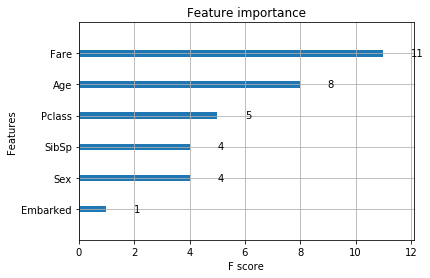

In [89]:

from functools import partial
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def preprocess(df):
    df['Fare'] = df ['Fare'].fillna(df['Fare'].mean())
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna('Unknown')
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    df['Embarked'] = df['Embarked'].map( {'S':0,'C':1,'Q':2,'Unknown':3} ).astype(int)
    df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
    return df

def train(df,max_depth,learning_rate,num_round):
    train_x = df.drop('Survived',axis=1)
    train_y = df.Survived
    dtrain = xgb.DMatrix(train_x,label=train_y)
    param = { 'max_depth':max_depth,'learning_rate':learning_rate,'objective':'binary:logistic'}
    bst = xgb.train(param,dtrain,num_round)
    return bst

def predict(bst,df):
    return bst.predict(xgb.DMatrix(df))

def main():
    df_original = pd.read_csv("/Users/pc1013/Desktop/first/XGBoost_optuna/df/train.csv")
    df_test = preprocess(df_original.tail(100))
    df_train = preprocess(df_original.head(791))
    y = df_test['Survived']
    df_test = df_test.drop('Survived',axis=1)
    
    max_depth = 3
    learning_rate = 0.6
    round_num = 5
    
    bst = train(df_train,max_depth,learning_rate,round_num)
    answer = predict(bst,df_train.drop('Survived',axis=1)).round().astype(int)
    print('train score :',accuracy_score(answer.round(),df_train['Survived']))
    answer = predict(bst,df_test).round().astype(int)
    print('test score :',accuracy_score(answer.round(),y))
    xgb.plot_importance(bst)

if __name__ == '__main__':
    main()


/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=12
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=15
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=20
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=17
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 prun

[I 2019-02-15 13:32:26,278] Finished a trial resulted in value: 0.14. Current best value is 0.14 with parameters: {'max_depth': 29, 'learning_rate': 0.36230945110496887, 'round_num': 27}.


[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=14
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 prun

[I 2019-02-15 13:32:26,454] Finished a trial resulted in value: 0.14. Current best value is 0.14 with parameters: {'max_depth': 29, 'learning_rate': 0.36230945110496887, 'round_num': 27}.


[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes

[I 2019-02-15 13:32:26,566] Finished a trial resulted in value: 0.12. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=16
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=14
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 prun

[I 2019-02-15 13:32:26,720] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=13
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=15
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=17
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 prune

[I 2019-02-15 13:32:26,889] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=11
[13:32:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes

[I 2019-02-15 13:32:27,044] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=12
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 prune

[I 2019-02-15 13:32:27,168] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes,

[I 2019-02-15 13:32:27,336] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 prune

[I 2019-02-15 13:32:27,525] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=16
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=17
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 prun

[I 2019-02-15 13:32:27,657] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

[I 2019-02-15 13:32:27,737] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=15
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned no

[I 2019-02-15 13:32:27,855] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=14
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=12
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned no

[I 2019-02-15 13:32:27,966] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, m

[I 2019-02-15 13:32:28,095] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=16
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=16
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 prun

[I 2019-02-15 13:32:28,217] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=12
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 prune

[I 2019-02-15 13:32:28,323] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes

[I 2019-02-15 13:32:28,414] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 22, 'learning_rate': 0.027993211773015225, 'round_num': 23}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=14
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 prune

[I 2019-02-15 13:32:28,576] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=14
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=17
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 prun

[I 2019-02-15 13:32:28,735] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=14
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=17
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 prun

[I 2019-02-15 13:32:28,893] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=13
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=11
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=14
[13:32:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 prune

[I 2019-02-15 13:32:29,027] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 prune

[I 2019-02-15 13:32:29,155] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=14
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=12
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned no

[I 2019-02-15 13:32:29,262] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 prune

[I 2019-02-15 13:32:29,397] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 prune

[I 2019-02-15 13:32:29,548] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=14
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=12
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=14
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=14
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=21
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 prun

[I 2019-02-15 13:32:29,702] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=14
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 prune

[I 2019-02-15 13:32:29,860] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=13
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=12
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=12
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=16
[13:32:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 prun

[I 2019-02-15 13:32:30,017] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=12
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=19
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 prun

[I 2019-02-15 13:32:30,186] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=14
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned n

[I 2019-02-15 13:32:30,368] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=14
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nod

[I 2019-02-15 13:32:30,546] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=14
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 prune

[I 2019-02-15 13:32:30,714] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=14
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=12
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned 

[I 2019-02-15 13:32:30,886] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=11
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=12
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=15
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=14
[13:32:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 prune

[I 2019-02-15 13:32:31,075] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=15
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=16
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 prune

[I 2019-02-15 13:32:31,250] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=15
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=14
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=17
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=16
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 prun

[I 2019-02-15 13:32:31,398] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=12
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned node

[I 2019-02-15 13:32:31,518] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=14
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nod

[I 2019-02-15 13:32:31,691] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=15
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=14
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=20
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=14
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 prun

[I 2019-02-15 13:32:31,869] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=11
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=14
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=13
[13:32:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned 

[I 2019-02-15 13:32:32,016] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=14
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=18
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 prun

[I 2019-02-15 13:32:32,174] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=18
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pru

[I 2019-02-15 13:32:32,336] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=16
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=17
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=16
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=18
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 prun

[I 2019-02-15 13:32:32,514] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=14
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 prune

[I 2019-02-15 13:32:32,645] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=13
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=12
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=12
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=15
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned

[I 2019-02-15 13:32:32,815] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=11
[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes

[I 2019-02-15 13:32:32,976] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=14
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned

[I 2019-02-15 13:32:33,168] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=11
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=11
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=14
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned n

[I 2019-02-15 13:32:33,350] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=11
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=16
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=12
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 prun

[I 2019-02-15 13:32:33,509] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=14
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=12
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned

[I 2019-02-15 13:32:33,721] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 27, 'learning_rate': 0.18616235056401118, 'round_num': 26}.


[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=8
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=15
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=13
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=11
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=11
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=14
[13:32:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 prune

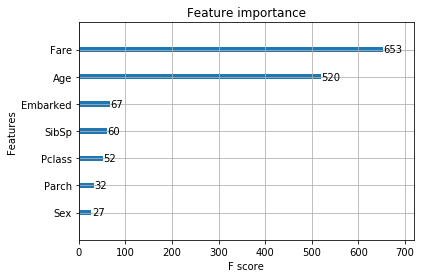

In [90]:
#optuna
from functools import partial
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def preprocess(df):
    df['Fare'] = df ['Fare'].fillna(df['Fare'].mean())
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna('Unknown')
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    df['Embarked'] = df['Embarked'].map( {'S':0,'C':1,'Q':2,'Unknown':3} ).astype(int)
    df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
    return df

def train(df,max_depth,learning_rate,num_round):
    train_x = df.drop('Survived',axis=1)
    train_y = df.Survived
    dtrain = xgb.DMatrix(train_x,label=train_y)
    param = { 'max_depth':max_depth,'learning_rate':learning_rate,'objective':'binary:logistic'}
    bst = xgb.train(param,dtrain,num_round)
    return bst

def predict(bst,df):
    return bst.predict(xgb.DMatrix(df))

def objective(df, df_test, y,trial):
    #目的関数
    max_depth = trial.suggest_int('max_depth',15,30)
    learning_rate = trial.suggest_uniform('learning_rate',0.0,0.5)
    round_num = trial.suggest_int('round_num',15,30)

    bst = train(df,max_depth,learning_rate,round_num)
    answer = predict(bst,df_test).round().astype(int)
    score = accuracy_score(answer.round(),y)
    return 1.0 - score

def main():
    df_original = pd.read_csv("/Users/pc1013/Desktop/first/XGBoost_optuna/df/train.csv")
    df_test = preprocess(df_original.tail(100))
    df_train = preprocess(df_original.head(791))
    y = df_test['Survived']
    df_test = df_test.drop('Survived',axis=1)
    
    #optunaの前処理
    obj_f = partial(objective, df_train, df_test, y)
    #セッション作成
    study = optuna.create_study()
    #回数
    
    study.optimize(obj_f, n_trials=50)
    max_depth = study.best_params['max_depth']
    learning_rate = study.best_params['learning_rate']
    round_num = study.best_params['round_num']
    
    bst = train(df_train,max_depth,learning_rate,round_num)
    print('\nparams :',study.best_params)
    answer = predict(bst,df_train.drop('Survived',axis=1)).round().astype(int)
    print('train score :',accuracy_score(answer.round(),df_train['Survived']))
    answer = predict(bst,df_test).round().astype(int)
    xgb.plot_importance(bst)
    print('test score :',accuracy_score(answer.round(),y))

if __name__ == '__main__':
    main()


/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/pc1013/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 30 pruned nodes, max_depth=10
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 16 pruned nodes, max_depth=8
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 20 pruned nodes, max_depth=5
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 20 pruned nodes, max_depth=8
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 42 pruned nodes, max_depth=8
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 28 pruned nodes, max_depth=10
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 38 pruned nodes, max_depth=8
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 34 pruned n

[I 2019-02-22 10:19:10,824] Finished a trial resulted in value: 0.14. Current best value is 0.14 with parameters: {'max_depth': 13, 'learning_rate': 0.6428223384463417, 'round_num': 16, 'gamma': 0.8762965693188579, 'colsample_bytree': 0.8238119886233887, 'min_childe_weigh': 0.5537469444856956, 'alpha': 0.8498558178097624}.


[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:10,881] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.14 with parameters: {'max_depth': 13, 'learning_rate': 0.6428223384463417, 'round_num': 16, 'gamma': 0.8762965693188579, 'colsample_bytree': 0.8238119886233887, 'min_childe_weigh': 0.5537469444856956, 'alpha': 0.8498558178097624}.


[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 20 pruned nodes, max_depth=12
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 16 pruned nodes, max_depth=7
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 20 pruned nodes, max_de

[I 2019-02-22 10:19:10,961] Finished a trial resulted in value: 0.20999999999999996. Current best value is 0.14 with parameters: {'max_depth': 13, 'learning_rate': 0.6428223384463417, 'round_num': 16, 'gamma': 0.8762965693188579, 'colsample_bytree': 0.8238119886233887, 'min_childe_weigh': 0.5537469444856956, 'alpha': 0.8498558178097624}.


[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:11,001] Finished a trial resulted in value: 0.14. Current best value is 0.14 with parameters: {'max_depth': 13, 'learning_rate': 0.6428223384463417, 'round_num': 16, 'gamma': 0.8762965693188579, 'colsample_bytree': 0.8238119886233887, 'min_childe_weigh': 0.5537469444856956, 'alpha': 0.8498558178097624}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=8
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 6 pruned nodes, max_depth=11
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 14 pruned nodes, max_depth=14
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 12 pruned nodes, max_depth=13
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 22 pruned nodes, max_depth=13
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 20 pruned nodes, max_depth=11
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 16 pruned

[I 2019-02-22 10:19:11,072] Finished a trial resulted in value: 0.12. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 24 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 24 pruned nodes, max_depth=13
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 50 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=13
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 28 pruned nodes, max_depth=11
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 60 pruned nodes, max_depth=9


[I 2019-02-22 10:19:11,115] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 22 pruned nodes, max_depth=11
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 22 pruned nodes, max_depth=5
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 60 pruned nodes, max_de

[I 2019-02-22 10:19:11,182] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_

[I 2019-02-22 10:19:11,231] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 4 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 22 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 16 pruned nodes, max_depth=9


[I 2019-02-22 10:19:11,257] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 42 pruned nodes, max_dep

[I 2019-02-22 10:19:11,336] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 20 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 30 pruned nodes, max_depth=15
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=6
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 10 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 12 pruned nodes, max_depth=7
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 28 pruned no

[I 2019-02-22 10:19:11,404] Finished a trial resulted in value: 0.14. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 4 pruned nodes, max_depth=13


[I 2019-02-22 10:19:11,435] Finished a trial resulted in value: 0.31999999999999995. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 8 pruned nodes, max_depth=16
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 20 pruned nodes, max_d

[I 2019-02-22 10:19:11,555] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 18 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 4 pruned nodes, max_depth=13
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 8 pruned nodes, max_

[I 2019-02-22 10:19:11,611] Finished a trial resulted in value: 0.12. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 8 pruned nodes, max_depth=12
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 8 pruned nodes, max_depth=7
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 8 pruned nodes, max_depth

[I 2019-02-22 10:19:11,662] Finished a trial resulted in value: 0.22999999999999998. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=8
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=8
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=8
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=8
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_d

[I 2019-02-22 10:19:11,755] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 14 pruned nodes, max_depth=12
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nodes, max_depth=14


[I 2019-02-22 10:19:11,805] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 20 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 28 pruned nodes, max_depth=12
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 24 pruned nodes, max_

[I 2019-02-22 10:19:11,866] Finished a trial resulted in value: 0.12. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 18 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 14 pruned nodes, max_depth=14
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 28 pruned nodes, max

[I 2019-02-22 10:19:11,918] Finished a trial resulted in value: 0.13. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 24 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:19:11,953] Finished a trial resulted in value: 0.27. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=9
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 28 pruned nodes, max_depth=12
[10:19:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=4
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 24 pruned nodes, m

[I 2019-02-22 10:19:12,031] Finished a trial resulted in value: 0.12. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 42 pruned nodes, max_depth=10
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 26 pruned nodes, max_depth=10
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 16 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 60 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=8
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 32 pruned node

[I 2019-02-22 10:19:12,137] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 18 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 8 pruned nodes, max_depth=15
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:19:12,186] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 16 pruned nodes, max_depth=10
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 14 pruned nodes, max_depth=8
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 18 pruned nodes, max_depth=16
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 24 pruned nodes, max_depth=11
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 32 pruned nodes, max_depth=17
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 42 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned

[I 2019-02-22 10:19:12,276] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 12 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 10 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 46 pruned nodes, max_depth=12
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 14 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 36 pruned nodes

[I 2019-02-22 10:19:12,387] Finished a trial resulted in value: 0.12. Current best value is 0.12 with parameters: {'max_depth': 27, 'learning_rate': 0.5672932225794404, 'round_num': 13, 'gamma': 0.10582369128061808, 'colsample_bytree': 0.9587603961691502, 'min_childe_weigh': 0.22522207757715507, 'alpha': 0.7167014522800929}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 28 pruned nodes, max_depth=6
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=4
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 16 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 42 pruned nodes, max_depth=12
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 16 pruned nodes, max_depth=5
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 50 pruned nodes

[I 2019-02-22 10:19:12,505] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned nodes, max_depth=10
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=5
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 32 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 44 pruned nodes, max_depth=12
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 24 pruned nodes, max_depth=7
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 36 pruned nodes, max_depth=6
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 30 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 46 pruned n

[I 2019-02-22 10:19:12,658] Finished a trial resulted in value: 0.12. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 20 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 22 pruned nodes, max_depth=5
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 26 pruned nodes, max_dep

[I 2019-02-22 10:19:12,768] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 32 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 50 pruned nodes, max_depth=13
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 52 pruned nodes, max_

[I 2019-02-22 10:19:12,857] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 18 pruned nodes, max_depth=11
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=8
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 26 pruned nodes, max_depth=4
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 26 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 62 pruned nodes, max_depth=8
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 44 pruned nodes, max_depth=9
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 36 pruned nodes, max_depth=10
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 22 pruned nodes, max_depth=5
[10:19:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 28 pruned n

[I 2019-02-22 10:19:13,011] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 12 pruned nodes, max_depth=8
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 16 pruned nodes, max_depth=6
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 18 pruned nodes, max_depth=8
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 42 pruned nodes, max_depth=7
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 24 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 52 pruned nodes, max_depth=8
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 34 pruned n

[I 2019-02-22 10:19:13,164] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 38 pruned nodes, max_depth=12
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 28 pruned nodes, max_depth=8
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 16 pruned nodes, max_depth=9
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 48 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 36 pruned nodes, max_depth=7
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 28 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 34 pruned nod

[I 2019-02-22 10:19:13,307] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 38 pruned nodes, max_depth=11
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=7
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 26 pruned nodes, max_depth=7
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 68 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 32 pruned nodes, max_depth=7
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 32 pruned nodes, max_depth=7
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 52 pruned no

[I 2019-02-22 10:19:13,447] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=9
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 4 pruned nodes, max_depth=11
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=9
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 8 pruned nodes, max_depth=17
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=15
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 2 pruned nodes, max_depth=13
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=13
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 8 pruned no

[I 2019-02-22 10:19:13,559] Finished a trial resulted in value: 0.13. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 30 pruned nodes, max_depth=5
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 50 pruned nodes, max_de

[I 2019-02-22 10:19:13,652] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=3
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_d

[I 2019-02-22 10:19:13,748] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 22 pruned nodes, max_de

[I 2019-02-22 10:19:13,815] Finished a trial resulted in value: 0.19999999999999996. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 4 pruned nodes, max_depth=9
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 4 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=8
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 4 pruned nodes, max_depth=11
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 14 pruned nodes, max_depth=11
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 10 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=11
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned no

[I 2019-02-22 10:19:13,918] Finished a trial resulted in value: 0.14. Current best value is 0.10999999999999999 with parameters: {'max_depth': 30, 'learning_rate': 0.3503904433100471, 'round_num': 22, 'gamma': 0.8680798524173249, 'colsample_bytree': 0.5376171253459172, 'min_childe_weigh': 0.48227277376383537, 'alpha': 0.8241583995064438}.


[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=13
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=9
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 18 pruned nodes, max_depth=11
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 14 pruned nodes, max_depth=14
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 18 pruned nodes, max_depth=10
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 8 pruned nodes, max_depth=14
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 30 pruned nodes, max_depth=3
[10:19:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 10 pruned 

[I 2019-02-22 10:19:14,048] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 24 pruned nodes, max_depth=14
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=8
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 38 pruned nodes, max_depth=9
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 24 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 30 pruned nodes, max_depth=13
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 42 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 38 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 48 prun

[I 2019-02-22 10:19:14,170] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 8 pruned nodes, max_depth=12
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 2 pruned nodes, max_depth=15
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 10 pruned nodes, max_depth=14
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 10 pruned nodes, max_depth=15
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 8 pruned nodes, max_depth=14
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 16 pruned nodes, max_depth=14
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=13
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 prune

[I 2019-02-22 10:19:14,327] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 12 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 24 pruned nodes, max_depth=14
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 30 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 30 pruned nodes, max_depth=12
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 46 pruned nodes, max_depth=12
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 40 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 54 pruned nodes, max_depth=5
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 54 pru

[I 2019-02-22 10:19:14,472] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 8 pruned nodes, max_depth=13
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 18 pruned nodes, max_depth=12
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 12 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 24 pruned nodes, max_depth=12
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 28 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 24 pruned nodes, max_depth=4
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 14 pruned 

[I 2019-02-22 10:19:14,622] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 14 pruned nodes, max_depth=13
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 34 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 20 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 38 pruned nodes, max_depth=12
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 34 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 28 pruned nodes, max_depth=2
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 26 pruned

[I 2019-02-22 10:19:14,765] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 12 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 8 pruned nodes, max_depth=8
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 30 pruned nodes, max_depth=8
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 32 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 36 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 44 pruned nodes, max_depth=9
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 34 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 36 pruned

[I 2019-02-22 10:19:14,885] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 14 pruned nodes, max_depth=10
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 8 pruned nodes, max_depth=5
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 16 pruned nodes, max_depth=9
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 14 pruned nodes, max_depth=17
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=5
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 16 pruned nodes, max_depth=11
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=6
[10:19:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 12 pruned no

[I 2019-02-22 10:19:15,023] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 6 pruned nodes, max_depth=11
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=8
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 16 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 30 pruned nodes, max_depth=11
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 24 pruned nodes, max_depth=12
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 30 pruned nodes, max_depth=12
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 36 pruned nodes, max_depth=5
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 18 pruned 

[I 2019-02-22 10:19:15,159] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_

[I 2019-02-22 10:19:15,296] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[I 2019-02-22 10:19:15,370] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 28 pruned nodes, max_depth=11
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 42 pruned nodes, max_depth=16
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 12 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 44 pruned nodes, m

[I 2019-02-22 10:19:15,478] Finished a trial resulted in value: 0.19999999999999996. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 18 pruned nodes, max_depth=10
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 8 pruned nodes, max_depth=5
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 8 pruned nodes, max_depth=17
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 12 pruned nodes, max_depth=6
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 16 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 14 pruned nodes

[I 2019-02-22 10:19:15,596] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 18 pruned nodes, max_depth=13
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 32 pruned nodes, max_depth=13
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 24 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 54 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 18 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 32 pruned nodes, max_depth=8
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 24 pruned nod

[I 2019-02-22 10:19:15,749] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 14 pruned nodes, max_depth=11
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 18 pruned nodes, max_depth=9
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 16 pruned nodes, max_de

[I 2019-02-22 10:19:15,852] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=6
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth

[I 2019-02-22 10:19:15,970] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 6 pruned nodes, max_depth=12
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, m

[I 2019-02-22 10:19:16,105] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 4 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 20 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 40 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 32 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=4


[I 2019-02-22 10:19:16,179] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=6
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=6
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=

[I 2019-02-22 10:19:16,260] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=8
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 2 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 4 pruned nodes, max_depth=17


[I 2019-02-22 10:19:16,328] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 8 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=7
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=8
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 10 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 30 pruned nodes, max_depth=12
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 2 pruned nodes, max_depth=8
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 20 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 16 pruned nodes, max_depth=5
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 28 pruned no

[I 2019-02-22 10:19:16,512] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 16 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=8
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 8 pruned nodes, max_depth=7
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 22 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 56 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 44 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 36 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 22 pruned nodes, max_depth=5
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 34 pruned 

[I 2019-02-22 10:19:16,607] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 4 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 8 pruned nodes, max_depth=13
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 20 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 6 pruned nodes, max_depth=14
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 8 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 16 pruned nodes, max_depth=13
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 18 pruned nodes, max_depth=12
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned n

[I 2019-02-22 10:19:16,734] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1


[I 2019-02-22 10:19:16,788] Finished a trial resulted in value: 0.31000000000000005. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 10 pruned nodes, max_depth=13
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 18 pruned nodes, max_depth=11
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 12 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 16 pruned node

[I 2019-02-22 10:19:16,905] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 14 pruned nodes, max_depth=10
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 4 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 20 pruned nodes, max_depth=15
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=5
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=9
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=6
[10:19:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 22 pruned node

[I 2019-02-22 10:19:17,060] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned nodes, max_depth=9
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 40 pruned nodes, max_depth=16
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 44 pruned nodes, max

[I 2019-02-22 10:19:17,184] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 6 pruned nodes, max_depth=9
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 2 pruned nodes, max_depth=13
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4


[I 2019-02-22 10:19:17,253] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=9
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=7
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 24 pruned nodes, max_depth=11
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=7
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=6
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 24 pruned nodes, m

[I 2019-02-22 10:19:17,355] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 12 pruned nodes, max_depth=10
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 20 pruned nodes, max_depth=11
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 42 pruned nodes, max_depth=8
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 26 pruned nodes, max_depth=11
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned nodes, max_depth=11
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 34 pruned nodes, max_depth=11
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 44 pruned nodes, max_depth=10
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 38 pru

[I 2019-02-22 10:19:17,495] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 38 pruned nodes, max_depth=12
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 22 pruned nodes, max_depth=8
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 18 pruned nodes, max_depth=7
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 50 pruned nodes, max_depth=8
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 12 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 22 pruned nodes, max_depth=8
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 50 pruned nodes

[I 2019-02-22 10:19:17,697] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=12
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=7
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 32 pruned nodes, max_depth=13
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 8 pruned nodes, max_depth=7
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 16 pruned nodes, m

[I 2019-02-22 10:19:17,813] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=8
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=7
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 22 pruned nodes, max_depth=12
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=6
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 20 pruned nodes, m

[I 2019-02-22 10:19:17,939] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 16 pruned nodes, max_depth=9
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 10 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 24 pruned nodes, max_dep

[I 2019-02-22 10:19:18,042] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=9
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 34 pruned nodes, max_depth=12
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned nodes, ma

[I 2019-02-22 10:19:18,135] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 10 pruned nodes, max_depth=13
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 4 pruned nodes, max_depth=11
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=9
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 12 pruned nodes, max_depth=11
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=6
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=7
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 18 pruned node

[I 2019-02-22 10:19:18,235] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 8 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=5
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_dep

[I 2019-02-22 10:19:18,341] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 4 pruned nodes, max_depth=9
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 18 pruned nodes, max_depth=14
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=7
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 26 pruned nodes,

[I 2019-02-22 10:19:18,444] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=9
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=7
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 32 pruned nodes, max_depth=13
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=5
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 32 pruned nodes, m

[I 2019-02-22 10:19:18,552] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 4 pruned nodes, max_depth=13
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 10 pruned nodes, max_depth=13
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 4 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 8 pruned nodes, max_depth=11
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 10 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned node

[I 2019-02-22 10:19:18,657] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 14 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 18 pruned nodes, max_depth=5
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 20 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 38 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 20 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 38 pruned nodes, max_depth=8
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 32 pruned no

[I 2019-02-22 10:19:18,795] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 20 pruned nodes, max_depth=9
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 26 pruned nodes, max_depth=16
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 32 pruned nodes, max_

[I 2019-02-22 10:19:18,889] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 48 pruned nodes, max_dep

[I 2019-02-22 10:19:18,988] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 32 pruned nodes, max_depth=16
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:19:19,115] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_depth=11
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:19:19,185] Finished a trial resulted in value: 0.31999999999999995. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 26 pruned nodes, max_depth=10
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 36 pruned nodes, max_depth=20
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=5


[I 2019-02-22 10:19:19,270] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=9
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 60 pruned nodes, max_dept

[I 2019-02-22 10:19:19,367] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=12
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=5
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 42 pruned nodes, max_de

[I 2019-02-22 10:19:19,532] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max_depth=10
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4


[I 2019-02-22 10:19:19,635] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:19,732] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 26 pruned nodes, max_depth=8
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 46 pruned nodes, max_dept

[I 2019-02-22 10:19:19,869] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 18 pruned nodes, max_depth=11
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 26 pruned nodes, max_depth=9
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 28 pruned nodes, max_de

[I 2019-02-22 10:19:19,977] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 10 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 14 pruned nodes, max_depth=6
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 22 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 20 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 44 pruned nodes, max_depth=6
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 18 pruned nodes

[I 2019-02-22 10:19:20,133] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 8 pruned nodes, max_depth=10
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 20 pruned nodes, max_depth=6


[I 2019-02-22 10:19:20,220] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=8
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 28 pruned nodes, max_depth=13
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 24 pruned nodes, m

[I 2019-02-22 10:19:20,365] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 28 pruned nodes, max_depth=13
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 38 pruned nodes, max_depth=11
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 28 pruned nodes, max_depth=11
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 28 pruned nodes, max_depth=14
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 24 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 32 pruned nodes, max_depth=10
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0


[I 2019-02-22 10:19:20,474] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 14 pruned nodes, max_depth=9
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 24 pruned nodes, max_depth=9
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 22 pruned nodes, max_depth=8
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_

[I 2019-02-22 10:19:20,621] Finished a trial resulted in value: 0.20999999999999996. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 12 pruned nodes, max_depth=9
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 8 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 32 pruned nodes, max_depth=10
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=5
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 40 pruned nodes, 

[I 2019-02-22 10:19:20,728] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=10
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 24 pruned nodes, max_depth=6
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=11
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 18 pruned nodes, max_depth=9
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 28 pruned nodes, max_depth=11
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 58 pruned nodes, max_depth=11
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 50 pruned nodes, max_depth=11
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 50 pruned nodes, max_depth=7
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 88 prune

[I 2019-02-22 10:19:20,902] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:19:20,979] Finished a trial resulted in value: 0.20999999999999996. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 10 pruned nodes, max_depth=8
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 4 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 4 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 10 pruned nodes

[I 2019-02-22 10:19:21,119] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 8 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=9
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 18 pruned nodes, ma

[I 2019-02-22 10:19:21,221] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 26 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 28 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 30 pruned nodes, max_depth=9
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 44 pruned nodes, max_depth=8
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 40 pruned nodes, max_depth=3
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 50 pruned nodes,

[I 2019-02-22 10:19:21,414] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 30 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=4
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 10 pruned nodes, max_depth=12
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 36 pruned nodes, max_depth=13
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 20 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 32 pruned nodes, max_depth=3
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 28 pruned 

[I 2019-02-22 10:19:21,541] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 10 pruned nodes, max_depth=9
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 18 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 10 pruned nodes, max_depth=9
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=9
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 24 pruned n

[I 2019-02-22 10:19:21,695] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 2 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=8
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=7
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 8 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 6 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 8 pruned nodes, max_depth=12
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 12 pruned nodes, max_depth=8
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 10 pruned no

[I 2019-02-22 10:19:21,839] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 10 pruned nodes, max_depth=11
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 8 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=9
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 32 pruned nodes, max_depth=10
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=5
[10:19:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 28 pruned nodes, max_depth=9


[I 2019-02-22 10:19:21,944] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=5
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 12 pruned nodes, max_depth=2


[I 2019-02-22 10:19:22,032] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 12 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 10 pruned nodes, max_depth=13
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes

[I 2019-02-22 10:19:22,177] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 26 pruned nodes, max_depth=13
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 24 pruned nodes, max_depth=12
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 20 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 64 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 14 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 38 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 38 pruned nod

[I 2019-02-22 10:19:22,345] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=12
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=4
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=8
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 16 pruned nodes, max_depth=14
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 6 pruned nodes, max_depth=4
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 14 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 10 pruned nodes

[I 2019-02-22 10:19:22,482] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=13
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 6 pruned nodes, max_depth=14
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 4 pruned nodes, max_depth=10
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 6 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 10 pruned node

[I 2019-02-22 10:19:22,618] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=10
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 16 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 14 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 12 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 34 pruned nodes, max_depth=10
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 20 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 8 pruned nodes, max_depth=10
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 20 pruned nodes, max_depth=7
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 28 pruned n

[I 2019-02-22 10:19:22,793] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned nodes, max_depth=9
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 36 pruned nodes, max_depth=12
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 12 pruned nodes, max_depth=2
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 32 pruned nodes, max_

[I 2019-02-22 10:19:22,955] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 20 pruned nodes, max_depth=11
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 14 pruned nodes, max_depth=7
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 22 pruned nodes, max_depth=7
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 46 pruned nodes, max_depth=8
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 56 pruned nodes, max_depth=9
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 56 pruned nodes, max_depth=8
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 58 pruned nodes, max_depth=5
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 28 pruned no

[I 2019-02-22 10:19:23,131] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 26 pruned nodes, max_depth=12


[I 2019-02-22 10:19:23,213] Finished a trial resulted in value: 0.35. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=8
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 2 pruned nodes, max_depth

[I 2019-02-22 10:19:23,327] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 22 pruned nodes, max_depth=10


[I 2019-02-22 10:19:23,417] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 22 pruned nodes, max_depth=13
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 4 pruned nodes, max_depth=7
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 16 pruned nodes, max_depth=6


[I 2019-02-22 10:19:23,507] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned nodes, max_depth=9
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 30 pruned nodes, max_depth=14
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 60 pruned nodes, max

[I 2019-02-22 10:19:23,671] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 6 pruned nodes, max_depth=11
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 14 pruned nodes, max_depth=9
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 8 pruned nodes, max_dept

[I 2019-02-22 10:19:23,786] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 24 pruned nodes, max_depth=13
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 46 pruned nodes, max_depth=6
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 50 pruned nodes, max_de

[I 2019-02-22 10:19:23,933] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_depth=9
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 40 pruned nodes, max_dept

[I 2019-02-22 10:19:24,095] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 26 pruned nodes, max_depth=10
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=7
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 20 pruned nodes, max_depth=7
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 46 pruned nodes, max_depth=14
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 40 pruned nodes, max_depth=9
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 46 pruned nodes, max_depth=8
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 32 pruned nodes, max_depth=2
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 24 pruned nod

[I 2019-02-22 10:19:24,301] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 26 pruned nodes, max_depth=10
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 40 pruned nodes, max_depth=12
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 14 pruned nodes, max

[I 2019-02-22 10:19:24,455] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 14 pruned nodes, max_depth=14
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 22 pruned nodes, max_depth=12
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 14 pruned nodes, max_depth=11
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 16 pruned nodes, max_depth=9
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 18 pruned nodes, max_depth=11
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 16 pruned nodes, max_depth=6
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 prun

[I 2019-02-22 10:19:24,620] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned nodes, max_depth=10
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=10
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 24 pruned nodes, max_depth=6
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 32 pruned nodes, max_depth=8
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned nodes, max_depth=7
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 44 pruned nodes, max_depth=9
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 34 pruned nodes, max_depth=3
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 46 pruned nodes, max_depth=0
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 32 pruned nod

[I 2019-02-22 10:19:24,805] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=8
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=7
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 16 pruned nodes, max_depth=9
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=9
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 40 pruned nodes, max_depth=10
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 22 pruned nodes, max_depth=8
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=10
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 22 pruned nodes, max_depth=8
[10:19:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 36 pruned 

[I 2019-02-22 10:19:24,990] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 14 pruned nodes, max_depth=8
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 36 pruned nodes, max_depth=8
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 26 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 36 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 40 pruned nodes, max_depth=5
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 44 pruned nodes, max_depth=5
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 62 pruned nodes, max_depth=5
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 52 pruned

[I 2019-02-22 10:19:25,151] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 22 pruned nodes, max_depth=9
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 34 pruned nodes, max_dep

[I 2019-02-22 10:19:25,307] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 10 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=7
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 10 pruned nodes, max_depth=8
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 20 pruned nodes, max_depth=14
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 12 pruned nodes, max_depth=7
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 22 pruned nodes, max_depth=9
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=5
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned no

[I 2019-02-22 10:19:25,449] Finished a trial resulted in value: 0.14. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 22 pruned nodes, max_depth=6
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 14 pruned nodes, max_depth=7
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 48 pruned nodes, max_depth=12
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=3
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 24 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 36 pruned nodes

[I 2019-02-22 10:19:25,608] Finished a trial resulted in value: 0.13. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=9
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 30 pruned nodes, max_depth=11
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 18 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 16 pruned node

[I 2019-02-22 10:19:25,753] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 24 pruned nodes, max_depth=14
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 28 pruned nodes,

[I 2019-02-22 10:19:25,892] Finished a trial resulted in value: 0.12. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=14
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 12 pruned nodes, max_depth=12
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 10 pruned nodes, max_depth=11
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 18 pruned nodes, max_depth=13
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 26 pruned nodes, max_depth=12
[10:19:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 20 pruned nodes, max_depth=4
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 14 prune

[I 2019-02-22 10:19:26,082] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.09999999999999998 with parameters: {'max_depth': 25, 'learning_rate': 0.7940305881837072, 'round_num': 20, 'gamma': 0.16948975190851495, 'colsample_bytree': 0.848247210495434, 'min_childe_weigh': 0.34031764371409695, 'alpha': 0.1332200659629273}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_dept

[I 2019-02-22 10:19:26,201] Finished a trial resulted in value: 0.08999999999999997. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3

[I 2019-02-22 10:19:26,318] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=8
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:19:26,426] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:26,541] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=5
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth

[I 2019-02-22 10:19:26,654] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 2 pruned nodes, max_depth=7
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 10 pruned nodes, max_depth=6
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 2 pruned nodes, max_depth

[I 2019-02-22 10:19:26,773] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:19:26,876] Finished a trial resulted in value: 0.21999999999999997. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:19:26,982] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=6
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=6
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=

[I 2019-02-22 10:19:27,101] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:19:27,209] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=7
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 2 pruned nodes, max_depth

[I 2019-02-22 10:19:27,356] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[I 2019-02-22 10:19:27,470] Finished a trial resulted in value: 0.25. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=5
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=5
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 6 pruned nodes, max_depth=

[I 2019-02-22 10:19:27,604] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth

[I 2019-02-22 10:19:27,730] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=10
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 10 pruned nodes, max_depth=8
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nodes, max_de

[I 2019-02-22 10:19:27,862] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=7
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 6 pruned nodes, max_depth=7
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_de

[I 2019-02-22 10:19:27,997] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 12 pruned nodes, max_depth=8
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 18 pruned nodes, max_dept

[I 2019-02-22 10:19:28,142] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 4 pruned nodes, max_depth=6
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 14 pruned nodes, max_depth=6
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_d

[I 2019-02-22 10:19:28,305] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 14 pruned nodes, max_depth=11
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=11
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 8 pruned nodes, max_depth=7
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 32 pruned nodes, max_depth=10
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 42 pruned nodes, max_depth=9
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 16 pruned node

[I 2019-02-22 10:19:28,468] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:28,604] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 14 pruned nodes, max_depth=9
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 34 pruned nodes, max_depth=13
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 6 pruned nodes, max_depth=1


[I 2019-02-22 10:19:28,720] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=10
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=5
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 46 pruned nodes, max_de

[I 2019-02-22 10:19:28,847] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=9
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 8 pruned nodes, max_depth=7
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 40 pruned nodes, max_depth=14
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=9
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 18 pruned nodes, 

[I 2019-02-22 10:19:28,999] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_depth=9
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 28 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1


[I 2019-02-22 10:19:29,118] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 10 pruned nodes, max_depth=13
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=7
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=8
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 20 pruned nodes, max_depth=13
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=9
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=9
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 18 pruned nodes, max_depth=6
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nod

[I 2019-02-22 10:19:29,288] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 26 pruned nodes, max_depth=5
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 46 pruned nodes, max_de

[I 2019-02-22 10:19:29,422] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_dep

[I 2019-02-22 10:19:29,578] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 28 pruned nodes, max_depth=8
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=7
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 28 pruned nodes, max_depth=12
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=10
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 10 pruned node

[I 2019-02-22 10:19:29,743] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=10
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 14 pruned nodes, max_depth=9
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 16 pruned nodes, max_depth=15
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 16 pruned nodes, max_depth=9
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 38 pruned nodes, max_depth=14
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 50 pruned nodes, max_depth=10
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 30 pruned nodes, max_depth=12
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 42 pruned nodes, max_depth=7
[10:19:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 40 prun

[I 2019-02-22 10:19:29,996] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 20 pruned nodes, max_depth=10
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=13
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 4 pruned nodes, ma

[I 2019-02-22 10:19:30,166] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 6 pruned nodes, max_depth=12
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 10 pruned nodes, max_depth=9
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 6 pruned nodes, max_depth=9
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 24 pruned nodes, max_depth=14
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=4
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=8
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 20 pruned nodes

[I 2019-02-22 10:19:30,305] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=7
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 16 pruned nodes, max_depth=14
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=7
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=8
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 16 pruned nodes,

[I 2019-02-22 10:19:30,467] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 4 pruned nodes, max_depth=10
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 20 pruned nodes, max_depth=9
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 16 pruned nodes, max_dep

[I 2019-02-22 10:19:30,618] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 20 pruned nodes, max_depth=10
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 6 pruned nodes, max_depth=12
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=9
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 32 pruned nodes, max_depth=9
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 26 pruned nodes, max_depth=7
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=5
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 14 pruned nodes

[I 2019-02-22 10:19:30,761] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:30,891] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 18 pruned nodes, max_depth=11
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 12 pruned nodes, max_depth=12
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 24 pruned nodes, max_depth=13
[10:19:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 46 pruned nodes, max_depth=11
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 32 pruned nodes, max_depth=16
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 40 pruned nodes, max_depth=11
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 30 pruned nodes, max_depth=12
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 12 p

[I 2019-02-22 10:19:31,051] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:19:31,168] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 8 pruned nodes, max_depth=8


[I 2019-02-22 10:19:31,280] Finished a trial resulted in value: 0.27. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 10 pruned nodes, max_depth=9
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 8 pruned nodes, max_depth=8
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 4 pruned nodes, max_depth=9
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=4
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=9
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=6
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, ma

[I 2019-02-22 10:19:31,450] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 2 pruned nodes, max_depth=14
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=11
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=10


[I 2019-02-22 10:19:31,573] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=12
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 22 pruned nodes, max_depth=13
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=7
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=8
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 24 pruned nodes, 

[I 2019-02-22 10:19:31,719] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 12 pruned nodes, max_depth=16
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 12 pruned nodes, max

[I 2019-02-22 10:19:31,888] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 12 pruned nodes, max_depth=6
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 10 pruned nodes, max_dep

[I 2019-02-22 10:19:32,053] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=10
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 16 pruned nodes, max_depth=10
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=5
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 8 pruned nodes, max_depth=7
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 16 pruned nodes, m

[I 2019-02-22 10:19:32,221] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 14 pruned nodes, max_depth=11
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=8
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 6 pruned nodes, max_depth=7
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 22 pruned nodes, max_depth=10
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 40 pruned nodes, max_depth=12
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 22 pruned nodes, max_depth=10
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 36 pruned nodes, max_depth=10
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 28 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 22 pruned

[I 2019-02-22 10:19:32,397] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=9
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 50 pruned nodes, max_dept

[I 2019-02-22 10:19:32,562] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_de

[I 2019-02-22 10:19:32,692] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 18 pruned nodes, max_depth=14
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 34 pruned nodes, m

[I 2019-02-22 10:19:32,848] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=11
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 8 pruned nodes, max_depth=14
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:19:32,994] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=10
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 20 pruned nodes, max_depth=13
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=7
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes,

[I 2019-02-22 10:19:33,166] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=10
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=5


[I 2019-02-22 10:19:33,285] Finished a trial resulted in value: 0.31999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 8 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 14 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 12 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 16 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 12 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 26 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 10 pruned nodes, max_depth=6
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 18 pruned nodes, max_depth=5
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 18 pruned nod

[I 2019-02-22 10:19:33,479] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 18 pruned nodes, max_depth=14
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4


[I 2019-02-22 10:19:33,610] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 24 pruned nodes, max_depth=10
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 38 pruned nodes, max_depth=7
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 44 pruned nodes, max_de

[I 2019-02-22 10:19:33,785] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=14
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=8
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=13
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 2 pruned nodes, max_depth=9
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 2 pruned nodes, max_depth=9
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, 

[I 2019-02-22 10:19:33,954] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=

[I 2019-02-22 10:19:34,137] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 18 pruned nodes, max_depth=13
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 14 pruned nodes, max_depth=8
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 38 pruned nodes, max_depth=9
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 32 pruned nodes, max_depth=9
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 42 pruned nodes, max_depth=12
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 50 pruned nodes, max_depth=5
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 48 pruned nodes, max_depth=8
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 42 pruned 

[I 2019-02-22 10:19:34,362] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 20 pruned nodes, max_depth=10
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 24 pruned nodes, max_depth=9
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 36 pruned nodes, max_de

[I 2019-02-22 10:19:34,513] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 14 pruned nodes, max_depth=13
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 18 pruned nodes, max_depth=13
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 26 pruned nodes, max_depth=13
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 16 pruned nodes, max_depth=3
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 48 pruned nodes, max_depth=9
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned 

[I 2019-02-22 10:19:34,714] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=

[I 2019-02-22 10:19:34,882] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=7
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=4
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=7
[10:19:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 4 pruned nodes, max_depth=7
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=5
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 18 pruned nodes, max_depth=7
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=4
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, ma

[I 2019-02-22 10:19:35,044] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=12
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=5
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth

[I 2019-02-22 10:19:35,268] Finished a trial resulted in value: 0.22999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 28 pruned nodes, max_depth=10
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=3
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 36 pruned nodes, max_depth=16


[I 2019-02-22 10:19:35,413] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 24 pruned nodes, max_depth=14
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 32 pruned nodes,

[I 2019-02-22 10:19:35,575] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=7
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=9
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=7
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 8 pruned nodes, max_depth=13
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=9
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=7
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=9
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 10 pruned nodes, m

[I 2019-02-22 10:19:35,782] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 6 pruned nodes, max_depth=12
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes, max_depth=12
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 12 pruned nodes, max_depth=12
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=10
[10:19:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=6


[I 2019-02-22 10:19:35,935] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 10 pruned nodes, max_depth=11
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 2 pruned nodes, max_depth=14
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 22 pruned nodes, max_depth=12
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 26 pruned nodes, max_depth=12
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 24 pruned nodes, max_depth=13
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 24 pruned nodes, max_depth=11
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 22 pruned nodes, max_depth=12
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pr

[I 2019-02-22 10:19:36,128] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 2 pruned nodes, max_depth=12
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 6 pruned nodes, max_depth=10
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 4 pruned nodes, max_depth=7
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 10 pruned nodes, max_depth=12
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 16 pruned nodes, max_depth=9
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 10 pruned nodes

[I 2019-02-22 10:19:36,311] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 4 pruned nodes, max_depth=9
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=9
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=8
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 16 pruned nodes, max_depth=9
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 28 pruned nodes, max_depth=8
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 8 pruned nodes, ma

[I 2019-02-22 10:19:36,496] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 2 pruned nodes, max_depth=12
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=10
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 14 pruned nodes, max_dep

[I 2019-02-22 10:19:36,694] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=10
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 26 pruned nodes, max_depth=7
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 28 pruned nodes, max_depth=13
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 28 pruned nodes, max_depth=7
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned nodes, max_depth=13
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 66 pruned nodes, max_depth=6
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 36 pruned nodes, max_depth=8
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 32 pruned nodes, max_depth=5
[10:19:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 48 pruned 

[I 2019-02-22 10:19:36,912] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 14 pruned nodes, max_depth=13
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 12 pruned nodes, max_depth=9
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 20 pruned nodes, max_depth=14
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 4 pruned nodes, max_depth=8
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 10 pruned nodes, max_depth=9


[I 2019-02-22 10:19:37,078] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 28 pruned nodes, max_depth=9
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 44 pruned nodes, max_depth=14
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 40 pruned nodes, max_de

[I 2019-02-22 10:19:37,279] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 16 pruned nodes, max_depth=11
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 28 pruned nodes, max_depth=4
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 42 pruned nodes, max_dep

[I 2019-02-22 10:19:37,472] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_dept

[I 2019-02-22 10:19:37,651] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 2 pruned nodes, max_depth=10
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth

[I 2019-02-22 10:19:37,813] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 6 pruned nodes, max_depth=10
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 2 pruned nodes, max_depth=7
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 10 pruned nodes, max_depth=11
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=8
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 4 pruned nodes, max_depth=10
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 8 pruned nodes, max_depth=7
[10:19:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes,

[I 2019-02-22 10:19:37,997] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 20 pruned nodes, max_depth=10
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 10 pruned nodes, max_depth=11
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 14 pruned nodes, m

[I 2019-02-22 10:19:38,214] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 20 pruned nodes, max_depth=15
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4


[I 2019-02-22 10:19:38,367] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[I 2019-02-22 10:19:38,536] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 22 pruned nodes, max_depth=10
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 22 pruned nodes, max_depth=6
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 28 pruned nodes, max_de

[I 2019-02-22 10:19:38,704] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nodes, max_depth=14
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 18 pruned nodes, ma

[I 2019-02-22 10:19:38,878] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:19:39,021] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 28 pruned nodes, max_depth=13
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=9
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 32 pruned nodes

[I 2019-02-22 10:19:39,217] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 20 pruned nodes, max_depth=14
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 28 pruned nodes, 

[I 2019-02-22 10:19:39,402] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 12 pruned nodes, max_depth=13
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=11
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=10
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 18 pruned nodes, max_depth=12
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 24 pruned nodes, max_depth=11
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned n

[I 2019-02-22 10:19:39,608] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes, max_depth=10
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=5
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=11
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 28 pruned nodes, max_depth=12
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 16 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 20 pruned nodes, max_depth=11
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=5
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 18 pruned no

[I 2019-02-22 10:19:39,817] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 28 pruned nodes, max_depth=13
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=7
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 16 pruned nodes, max_depth=6
[10:19:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=4


[I 2019-02-22 10:19:39,987] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3


[I 2019-02-22 10:19:40,138] Finished a trial resulted in value: 0.31999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 8 pruned nodes, max_depth=11
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=9


[I 2019-02-22 10:19:40,307] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 22 pruned nodes, max_depth=10
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 38 pruned nodes, max_depth=5
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 74 pruned nodes, max_de

[I 2019-02-22 10:19:40,524] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:19:40,716] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 4 pruned nodes, max_depth=10
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=6
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 4 pruned nodes, max_depth

[I 2019-02-22 10:19:40,904] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=9
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=14
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes, max

[I 2019-02-22 10:19:41,108] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 2 pruned nodes, max_depth=11
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_de

[I 2019-02-22 10:19:41,308] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 8 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 10 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 14 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, m

[I 2019-02-22 10:19:41,526] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 30 pruned nodes, max_depth=10
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=8
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 20 pruned nodes, max_depth=7
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 52 pruned nodes, max_depth=9
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 24 pruned nodes, max_depth=7
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 42 pruned nodes, max_depth=7
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 40 pruned no

[I 2019-02-22 10:19:41,810] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=6
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 14 pruned nodes, max_depth=5
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 20 pruned nodes, max_depth=6
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 16 pruned nodes, max_depth=1
[10:19:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, ma

[I 2019-02-22 10:19:42,030] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 18 pruned nodes, max_depth=13
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 46 pruned nodes, max_depth=11
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 46 pruned nodes, max_depth=12
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 74 pruned nodes, max_depth=5
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 36 pruned n

[I 2019-02-22 10:19:42,286] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[I 2019-02-22 10:19:42,471] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 6 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 32 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 28 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 36 pruned nodes, max_depth=8
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 34 pruned node

[I 2019-02-22 10:19:42,707] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 22 pruned nodes, max_depth=10
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=7
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 20 pruned nodes, max_depth=7
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 48 pruned nodes, max_depth=10
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 24 pruned nodes, max_depth=7
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 42 pruned nodes, max_depth=7
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 20 pruned nodes, max_depth=4
[10:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 36 pruned n

[I 2019-02-22 10:19:42,955] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4

[I 2019-02-22 10:19:43,140] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:19:43,287] Finished a trial resulted in value: 0.28. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 12 pruned nodes, max_depth=7
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=7
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=5
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=6
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=2
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 16 pruned nodes, ma

[I 2019-02-22 10:19:43,481] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 26 pruned nodes, max_depth=6
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 12 pruned nodes, max_depth=7
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 52 pruned nodes, max_depth=10
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 28 pruned nodes, max_depth=6
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 34 pruned nodes

[I 2019-02-22 10:19:43,712] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 22 pruned nodes, max_depth=10
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 16 pruned nodes, max_depth=13
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=9
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 26 pruned nodes, 

[I 2019-02-22 10:19:43,879] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=10
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 18 pruned nodes, max_depth=9
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 40 pruned nodes, max_de

[I 2019-02-22 10:19:44,056] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 18 pruned nodes, max_depth=14
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 34 pruned nodes, ma

[I 2019-02-22 10:19:44,229] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 16 pruned nodes, max_depth=9
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 24 pruned nodes, max_depth=4
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 36 pruned nodes, max_dept

[I 2019-02-22 10:19:44,426] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=9
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=14
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 8 pruned nodes, max_depth=13
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 12 pruned nodes, max_depth=12
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 6 pruned nodes, max_depth=10
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 2 pruned nodes

[I 2019-02-22 10:19:44,649] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 24 pruned nodes, max_depth=10
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=9
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 28 pruned nodes, max_depth=14
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=9
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 36 pruned nodes,

[I 2019-02-22 10:19:44,855] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=10
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=4
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 2 pruned nodes, max_depth=7
[10:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 16 pruned nodes, max_depth=13
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 6 pruned nodes, max_depth=4
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 12 pruned nodes, max_depth=7
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned nodes, 

[I 2019-02-22 10:19:45,065] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_de

[I 2019-02-22 10:19:45,243] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 20 pruned nodes, max_depth=9
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 32 pruned nodes, max_depth=4
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 60 pruned nodes, max_dept

[I 2019-02-22 10:19:45,457] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=8
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 34 pruned nodes, max_depth=7
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 42 pruned nodes, max_depth=12
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 30 pruned nodes, max_depth=12
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 38 pruned nodes, max_depth=11
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 58 pruned nodes, max_depth=6
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 52 pruned nodes, max_depth=5
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 44 pruned nodes, max_depth=9
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 72 pruned 

[I 2019-02-22 10:19:45,682] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=10
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 10 pruned nodes, max_depth=8
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 14 pruned nodes, max_dep

[I 2019-02-22 10:19:45,864] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:19:46,029] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=10
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=8
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 16 pruned nodes, max_depth=19
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=7
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 16 pruned nodes, max_depth=12
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 16 pruned nod

[I 2019-02-22 10:19:46,252] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 6 pruned nodes, max_depth=14
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 16 pruned nodes, max_depth=11
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=5
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 10 pruned nodes, max_depth=10
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 28 pruned nodes, max_depth=12


[I 2019-02-22 10:19:46,431] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 4 pruned nodes, max_depth=10
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=8
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 12 pruned nodes, max_depth=11
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 10 pruned nodes, max_depth=9
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 10 pruned nodes, max_depth=9
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=5
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes,

[I 2019-02-22 10:19:46,645] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 18 pruned nodes, max_depth=9
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 26 pruned nodes, max_depth=14
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 18 pruned nodes, max_

[I 2019-02-22 10:19:46,842] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 28 pruned nodes, max_depth=15
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 42 pruned nodes,

[I 2019-02-22 10:19:47,031] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=7
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 32 pruned nodes, max_depth=13
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=3
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 22 pruned nodes, max_depth=6
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1


[I 2019-02-22 10:19:47,205] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 34 pruned nodes, max_depth=13
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 26 pruned nodes, max_depth=8
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 20 pruned nodes, max_depth=9
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 50 pruned nodes, max_depth=10
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 12 pruned nodes, max_depth=3


[I 2019-02-22 10:19:47,382] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 14 pruned nodes, max_depth=10
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 28 pruned nodes, max_depth=6
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 38 pruned nodes, max_de

[I 2019-02-22 10:19:47,558] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 18 pruned nodes, max_depth=13
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 10 pruned nodes, max_depth=11
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 8 pruned nodes, max_depth=9
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 40 pruned nodes, max_depth=9
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=5
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 48 pruned nodes, max_depth=9
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 26 pruned nodes, max_depth=3


[I 2019-02-22 10:19:47,744] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 22 pruned nodes, max_depth=10
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=7
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 24 pruned nodes, max_depth=11
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=7
[10:19:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 20 pruned nodes, max_depth=8


[I 2019-02-22 10:19:47,914] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 22 pruned nodes, max_depth=16
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 26 pruned nodes, max

[I 2019-02-22 10:19:48,088] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 26 pruned nodes, max_depth=9
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 26 pruned nodes, max_depth=14
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 50 pruned nodes, max

[I 2019-02-22 10:19:48,268] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=12
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 10 pruned nodes, max_depth=11


[I 2019-02-22 10:19:48,427] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 22 pruned nodes, max_depth=10
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 6 pruned nodes, max_depth=9
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 34 pruned nodes, max_depth=12
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 16 pruned nodes, max_depth=9
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 28 pruned nodes,

[I 2019-02-22 10:19:48,640] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 34 pruned nodes, max_depth=13
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_depth=7
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 22 pruned nodes, max_depth=7


[I 2019-02-22 10:19:48,815] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=12
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 8 pruned nodes, max_depth=14
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=7
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=7
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[10:19:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 2 pruned nodes, m

[I 2019-02-22 10:19:49,013] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=11
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 20 pruned nodes, max_depth=14
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:19:49,202] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 12 pruned nodes, max_depth=13
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=9
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=9
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 26 pruned nodes, max_depth=10
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4


[I 2019-02-22 10:19:49,394] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 26 pruned nodes, max_depth=11
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 14 pruned nodes, max_depth=8
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 14 pruned nodes, max_depth=8
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 54 pruned nodes, max_depth=8
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 20 pruned nodes, max_depth=8
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned node

[I 2019-02-22 10:19:49,591] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=8
[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 32 pruned nodes, max_depth=14


[I 2019-02-22 10:19:49,773] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned nodes, max_depth=10


[I 2019-02-22 10:19:49,943] Finished a trial resulted in value: 0.28. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 20 pruned nodes, max_depth=10
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 28 pruned nodes, max_depth=9
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=8
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 30 pruned nodes, max_depth=10
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 52 pruned nodes, max_depth=7
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 20 pruned nodes

[I 2019-02-22 10:19:50,152] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 40 pruned nodes, max_depth=6
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=3


[I 2019-02-22 10:19:50,315] Finished a trial resulted in value: 0.26. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 26 pruned nodes, max_depth=11
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 32 pruned nodes, max_depth=9
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 12 pruned nodes, max_depth=9
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 70 pruned nodes, max_depth=9
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=4
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 22 pruned nodes, max_depth=8
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 20 pruned nodes, max_depth=5
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 32 pruned nod

[I 2019-02-22 10:19:50,621] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 18 pruned nodes, max_depth=9
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 14 pruned nodes, max_depth=8
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:19:50,814] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 30 pruned nodes, max_depth=10
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=7
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 22 pruned nodes, max_depth=7
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 54 pruned nodes, max_depth=14
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 42 pruned nodes, max_depth=7
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 64 pruned nodes, max_depth=4
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[10:19:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 36 pruned nod

[I 2019-02-22 10:19:51,071] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_depth=10
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=10
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 50 pruned nodes, max_d

[I 2019-02-22 10:19:51,285] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 16 pruned nodes, max_depth=13
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 40 pruned nodes, max_depth=11
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 24 pruned nodes, max_depth=10
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 42 pruned nodes, max_depth=14
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 24 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 60 pruned nodes, max_depth=9
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 36 pruned n

[I 2019-02-22 10:19:51,524] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 12 pruned nodes, max_depth=9
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 6 pruned nodes, max_depth=7
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 36 pruned nodes, max_depth=13
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 14 pruned nodes, max_depth=1
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 34 pruned nodes, 

[I 2019-02-22 10:19:51,729] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 12 pruned nodes, max_depth=9
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 10 pruned nodes, max_depth=7
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 42 pruned nodes, max_depth=10
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 20 pruned nodes, max_depth=8
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[10:19:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 32 pruned node

[I 2019-02-22 10:19:51,942] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 8 pruned nodes, max_depth=13
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 2 pruned nodes, max_depth=8
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=9
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 20 pruned nodes, max_depth=9
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 32 pruned nodes, max_depth=14
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 40 pruned nodes, max_depth=10
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 32 pruned nodes, max_depth=12
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 42 pruned 

[I 2019-02-22 10:19:52,151] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max_depth=10
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_depth=12
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 16 pruned nodes, max_depth=9
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 42 pruned nodes, max_depth=9
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 30 pruned nodes, max_depth=7
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 26 pruned nodes

[I 2019-02-22 10:19:52,362] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 12 pruned nodes, max_depth=11
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 2 pruned nodes, max_depth=14
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=5
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 6 pruned nodes, 

[I 2019-02-22 10:19:52,586] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:19:52,776] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=10
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=13
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=7
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=6
[10:19:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, ma

[I 2019-02-22 10:19:52,973] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=12
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=7
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth

[I 2019-02-22 10:19:53,187] Finished a trial resulted in value: 0.21999999999999997. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=9
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=14
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 6 pruned nodes, max_

[I 2019-02-22 10:19:53,407] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4


[I 2019-02-22 10:19:53,590] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 16 pruned nodes, max_depth=11
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 32 pruned nodes, max_depth=7
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 40 pruned nodes, max_de

[I 2019-02-22 10:19:53,778] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 8 pruned nodes, max_depth=10
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 18 pruned nodes, max_depth=8
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 18 pruned nodes, max_dep

[I 2019-02-22 10:19:53,975] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 22 pruned nodes, max_depth=6
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 24 pruned nodes, max_depth=9
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 32 pruned nodes, max_depth=11
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 16 pruned nodes, max_depth=1
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 48 pruned nodes, max_depth=4
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 34 pruned nodes,

[I 2019-02-22 10:19:54,180] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=10
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 10 pruned nodes, max_depth=6
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 22 pruned nodes, max_depth=9
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 20 pruned nodes, max_depth=9
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 20 pruned nodes, max_depth=12
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 34 pruned nodes, max_depth=10
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 32 pruned nodes, max_depth=8


[I 2019-02-22 10:19:54,372] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=9
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 40 pruned nodes, max_depth=13
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 10 pruned nodes, max_d

[I 2019-02-22 10:19:54,601] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 28 pruned nodes, max_depth=13
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=7
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=7
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=4


[I 2019-02-22 10:19:54,801] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 28 pruned nodes, max_depth=16
[10:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:19:54,995] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:19:55,184] Finished a trial resulted in value: 0.27. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 8 pruned nodes, max_depth=9
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 12 pruned nodes, max_depth=14
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 20 pruned nodes, max_depth=12
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 20 pruned nodes, max_depth=11
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 24 pruned nodes, max_depth=13
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 38 pruned nodes, max_depth=11
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 42 pruned nodes, max_depth=8


[I 2019-02-22 10:19:55,383] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 14 pruned nodes, max_depth=10


[I 2019-02-22 10:19:55,563] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 14 pruned nodes, max_depth=13
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 14 pruned nodes, max_depth=8


[I 2019-02-22 10:19:55,763] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 4 pruned nodes, max_depth=11
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 16 pruned nodes, max_depth=14
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 14 pruned nodes, max_depth=10
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 16 pruned nodes, max_depth=15
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 28 pruned nodes, max_depth=13
[10:19:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 32 pruned nodes, max_depth=17


[I 2019-02-22 10:19:55,977] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max_depth=11
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 6 pruned nodes, max_depth=16
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=8
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 4 pruned nodes, m

[I 2019-02-22 10:19:56,189] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 2 pruned nodes, max_depth=7
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 2 pruned nodes, max_depth=9
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 10 pruned nodes, max_depth=10
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 6 pruned nodes, max_depth=14
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 4 pruned nodes, max_depth=12
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 10 pruned nodes

[I 2019-02-22 10:19:56,413] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 4 pruned nodes, max_depth=10
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=10
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 26 pruned nodes, max_de

[I 2019-02-22 10:19:56,614] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 14 pruned nodes, max_depth=10
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1


[I 2019-02-22 10:19:56,809] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 28 pruned nodes, max_depth=16
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:19:57,015] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 12 pruned nodes, max_depth=10
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2


[I 2019-02-22 10:19:57,209] Finished a trial resulted in value: 0.21999999999999997. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max_depth=10
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 10 pruned nodes, max_depth=16
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4


[I 2019-02-22 10:19:57,412] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 16 pruned nodes, max_depth=10
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 12 pruned nodes, max_depth=9
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 16 pruned nodes, max_depth=19
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=6
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=9


[I 2019-02-22 10:19:57,620] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 10 pruned nodes, max_depth=11
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 10 pruned nodes, max_depth=15
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=5
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=9
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:19:57,829] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4


[I 2019-02-22 10:19:58,024] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=10
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4


[I 2019-02-22 10:19:58,215] Finished a trial resulted in value: 0.30000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 18 pruned nodes, max_depth=16


[I 2019-02-22 10:19:58,417] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 40 pruned nodes, max_depth=14
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max

[I 2019-02-22 10:19:58,622] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=5
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=

[I 2019-02-22 10:19:58,828] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 8 pruned nodes, max_depth=10
[10:19:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 12 pruned nodes, max_depth=11
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 20 pruned nodes, max_de

[I 2019-02-22 10:19:59,047] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 6 pruned nodes, max_depth=10


[I 2019-02-22 10:19:59,228] Finished a trial resulted in value: 0.31999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 18 pruned nodes, max_depth=15
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:19:59,432] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=6
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=

[I 2019-02-22 10:19:59,651] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=11
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:19:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 32 pruned nodes, max_depth=13


[I 2019-02-22 10:19:59,863] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=9
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 26 pruned nodes, max_depth=13
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4


[I 2019-02-22 10:20:00,070] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 6 pruned nodes, max_depth=12
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 8 pruned nodes, max_depth=11
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 16 pruned nodes, max_de

[I 2019-02-22 10:20:00,292] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 18 pruned nodes, max_depth=13
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 8 pruned nodes, max_depth=7
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 12 pruned nodes, max_depth=9


[I 2019-02-22 10:20:00,498] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=11
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=7
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 2 pruned nodes, max_depth=13
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 4 pruned nodes, max_depth=11
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 6 pruned nodes, max_depth=15
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 8 pruned nodes, max_depth=5
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned node

[I 2019-02-22 10:20:00,703] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 4 pruned nodes, max_depth=10
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=11
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 4 pruned nodes, max_dep

[I 2019-02-22 10:20:00,906] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 8 pruned nodes, max_depth=9
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 2 pruned nodes, max_depth=10
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=9
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 6 pruned nodes, max_depth=15
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 6 pruned nodes, max_depth=12
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 10 pruned nodes, max_depth=14
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 14 pruned nodes, max_depth=9
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 4 pruned nod

[I 2019-02-22 10:20:01,127] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:01,330] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 12 pruned nodes, max_depth=13
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 8 pruned nodes, max_depth=11
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:20:01,520] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12


[I 2019-02-22 10:20:01,757] Finished a trial resulted in value: 0.30000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 8 pruned nodes, max_depth=13
[10:20:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 8 pruned nodes, max_depth=11


[I 2019-02-22 10:20:01,963] Finished a trial resulted in value: 0.22999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 6 pruned nodes, max_depth=14
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 8 pruned nodes, max_depth=11
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 8 pruned nodes, max_depth=11
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 12 pruned nodes, max_depth=14
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 10 pruned nodes, max_depth=8
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 14 pruned nodes, max_depth=11


[I 2019-02-22 10:20:02,188] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[I 2019-02-22 10:20:02,425] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 12 pruned nodes, max_depth=10
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 14 pruned nodes, max_depth=11


[I 2019-02-22 10:20:02,635] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=6
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 16 pruned nodes, max_depth=9
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=9
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 24 pruned nodes, max_depth=13
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 44 pruned nodes, max_depth=12
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 38 pruned nodes, max_depth=10
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 36 pruned nodes, max_depth=9
[10:20:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned 

[I 2019-02-22 10:20:02,850] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 6 pruned nodes, max_depth=8
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 20 pruned nodes, max_depth=8
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_dept

[I 2019-02-22 10:20:03,081] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max_depth=10
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 30 pruned nodes, max_depth=15
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 6 pruned nodes, max_depth=5
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 24 pruned nodes,

[I 2019-02-22 10:20:03,306] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 8 pruned nodes, max_depth=13
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 8 pruned nodes, max_depth=11
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 16 pruned nodes, max_d

[I 2019-02-22 10:20:03,553] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_de

[I 2019-02-22 10:20:03,779] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 4 pruned nodes, max_depth=16
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 10 pruned nodes, ma

[I 2019-02-22 10:20:04,016] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 18 pruned nodes, max_depth=11
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 20 pruned nodes, max_depth=18
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=5


[I 2019-02-22 10:20:04,233] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 4 pruned nodes, max_depth=7
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 34 pruned nodes, max_depth=12
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 16 pruned nodes, max_depth=9
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=3


[I 2019-02-22 10:20:04,450] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 12 pruned nodes, max_depth=8
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 6 pruned nodes, max_depth=7
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 28 pruned nodes, max_depth=11
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 16 pruned nodes, max_depth=6
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 16 pruned nodes, max_depth=1
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 28 pruned nodes,

[I 2019-02-22 10:20:04,690] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 2 pruned nodes, max_depth=13
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 10 pruned nodes, max_depth=11
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_depth=10
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 18 pruned nodes, max_depth=9
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=5
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=7
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[10:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 14 pruned nod

[I 2019-02-22 10:20:04,971] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 18 pruned nodes, max_depth=9
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=8
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=8
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 30 pruned nodes, max_depth=9
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 22 pruned nodes, max_depth=8
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 32 pruned nodes, max_depth=9
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 24 pruned nodes

[I 2019-02-22 10:20:05,219] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[I 2019-02-22 10:20:05,451] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_

[I 2019-02-22 10:20:05,683] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=10
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 22 pruned nodes, max_depth=6
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 26 pruned nodes, max_depth=11
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=9
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 36 pruned nodes, max_depth=13
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 34 pruned nodes, max_depth=12
[10:20:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 50 pruned nodes, max_depth=9


[I 2019-02-22 10:20:05,922] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 4 pruned nodes, max_depth=13
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=11
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=9


[I 2019-02-22 10:20:06,148] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=9
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 18 pruned nodes, max_depth=14
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 20 pruned nodes, max

[I 2019-02-22 10:20:06,390] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes, max_depth=10
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4


[I 2019-02-22 10:20:06,607] Finished a trial resulted in value: 0.30000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 10 pruned nodes, max_depth=10
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=4
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 8 pruned nodes, max_depth=13
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=5
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 8 pruned nodes, max_depth=9
[10:20:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=7


[I 2019-02-22 10:20:06,847] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=7
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 14 pruned nodes, max_depth=7
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 16 pruned nodes, max_d

[I 2019-02-22 10:20:07,095] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 16 pruned nodes, max_depth=10


[I 2019-02-22 10:20:07,316] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 24 pruned nodes, max_depth=11
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 20 pruned nodes, max_depth=14
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=5
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=8
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=2
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 28 pruned nodes

[I 2019-02-22 10:20:07,601] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 10 pruned nodes, max_depth=13
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 4 pruned nodes, max_depth=9
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 8 pruned nodes, max_depth=9
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 24 pruned nodes, max_depth=10
[10:20:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4


[I 2019-02-22 10:20:07,838] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 10 pruned nodes, max_depth=13
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 10 pruned nodes, max_depth=11
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes, max_depth=10
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 16 pruned nodes, max_depth=13
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 20 pruned nodes, max_depth=9


[I 2019-02-22 10:20:08,070] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=11
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 2 pruned nodes, max_depth=11
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_de

[I 2019-02-22 10:20:08,287] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 20 pruned nodes, max_depth=13
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=7
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=8
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 22 pruned nodes, max_depth=11
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 30 pruned nodes, max_depth=10
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 32 pruned nodes, max_depth=10
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 20 pruned n

[I 2019-02-22 10:20:08,543] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=9
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=8
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 14 pruned nodes, max_depth=14
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 40 pruned nodes, max_depth=7
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[10:20:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 18 pruned nodes, 

[I 2019-02-22 10:20:08,832] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 16 pruned nodes, max_depth=13
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 24 pruned nodes, ma

[I 2019-02-22 10:20:09,061] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 16 pruned nodes, max_depth=15
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:20:09,280] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 20 pruned nodes, max_depth=10
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 12 pruned nodes, max_depth=10
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4


[I 2019-02-22 10:20:09,500] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 14 pruned nodes, max_depth=10
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 26 pruned nodes, max_depth=8
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 34 pruned nodes, max_de

[I 2019-02-22 10:20:09,722] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 8 pruned nodes, max_depth=8
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=7
[10:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=8


[I 2019-02-22 10:20:09,937] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 20 pruned nodes, max_depth=10
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 8 pruned nodes, max_depth=10
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:20:10,146] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=9
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=9


[I 2019-02-22 10:20:10,369] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 30 pruned nodes, max_depth=12


[I 2019-02-22 10:20:10,583] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=5
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=

[I 2019-02-22 10:20:10,814] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=7
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:20:11,019] Finished a trial resulted in value: 0.25. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 14 pruned nodes, max_depth=11


[I 2019-02-22 10:20:11,233] Finished a trial resulted in value: 0.35. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 4 pruned nodes, max_depth=10
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=6
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 14 pruned nodes, max_dep

[I 2019-02-22 10:20:11,478] Finished a trial resulted in value: 0.19999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_d

[I 2019-02-22 10:20:11,724] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 12 pruned nodes, max_depth=11
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=7
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 2 pruned nodes, max_depth=8
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 16 pruned nodes, max_depth=9
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 28 pruned nodes, max_depth=10
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 14 pruned nodes, max_depth=8
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=8
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[10:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 50 pruned n

[I 2019-02-22 10:20:11,977] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 4 pruned nodes, max_depth=10
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 6 pruned nodes, max_depth=10
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 2 pruned nodes, max_dept

[I 2019-02-22 10:20:12,259] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=5
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=5
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 14 pruned nodes, max_depth=5


[I 2019-02-22 10:20:12,510] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=8
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 2 pruned nodes, max_depth=10
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 4 pruned nodes, max_depth=10
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 8 pruned nodes, max_depth=14
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 4 pruned nodes, max_depth=13
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 2 pruned nodes, max_depth=13
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=10
[10:20:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 4 pruned node

[I 2019-02-22 10:20:12,817] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=10
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=8
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 6 pruned nodes, max_depth=8
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 8 pruned nodes, max_depth=10
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nodes, max_depth=12
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 14 pruned nodes, max_depth=9
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=5
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 26 pruned nod

[I 2019-02-22 10:20:13,100] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 10 pruned nodes, max_depth=6
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 20 pruned nodes, max_depth=5
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_dept

[I 2019-02-22 10:20:13,364] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:20:13,618] Finished a trial resulted in value: 0.19999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 18 pruned nodes, max_depth=15
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2


[I 2019-02-22 10:20:13,859] Finished a trial resulted in value: 0.09999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 16 pruned nodes, max_depth=11
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 26 pruned nodes, max_depth=6
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:14,114] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 24 pruned nodes, max_depth=10
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 46 pruned nodes, max_depth=6
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 48 pruned nodes, max_de

[I 2019-02-22 10:20:14,364] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[I 2019-02-22 10:20:14,590] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=11
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 2 pruned nodes, max_depth=14
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=8
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 14 pruned nodes, ma

[I 2019-02-22 10:20:14,862] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 28 pruned nodes, max_depth=9
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:15,088] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 18 pruned nodes, max_depth=10
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 10 pruned nodes, max_depth=14
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 10 pruned nodes

[I 2019-02-22 10:20:15,391] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 6 pruned nodes, max_depth=6
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 12 pruned nodes, max_depth=6
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 14 pruned nodes, max_depth=6
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 12 pruned nodes, max_depth=6
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, ma

[I 2019-02-22 10:20:15,648] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 22 pruned nodes, max_depth=10


[I 2019-02-22 10:20:15,883] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:16,121] Finished a trial resulted in value: 0.25. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 22 pruned nodes, max_depth=9
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 34 pruned nodes, max_depth=6
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 42 pruned nodes, max_dep

[I 2019-02-22 10:20:16,424] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:20:16,666] Finished a trial resulted in value: 0.27. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 14 pruned nodes, max_depth=11
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 6 pruned nodes, max_depth=17
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=11
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 6 pruned nodes, 

[I 2019-02-22 10:20:16,951] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:20:17,214] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 22 pruned nodes, max_depth=11
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 20 pruned nodes, max_depth=15
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=5
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=8
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 14 pruned nodes

[I 2019-02-22 10:20:17,495] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 16 pruned nodes, max_depth=15
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 26 pruned nodes, m

[I 2019-02-22 10:20:17,833] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 12 pruned nodes, max_depth=10
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=5
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=8


[I 2019-02-22 10:20:18,092] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max

[I 2019-02-22 10:20:18,358] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:20:18,637] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 4 pruned nodes, max_depth=12
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 2 pruned nodes, max_depth=11
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 6 pruned nodes, max_dep

[I 2019-02-22 10:20:18,909] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=7
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=3
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=8
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=5
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 6 pruned nodes, max_depth=8
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_d

[I 2019-02-22 10:20:19,229] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:20:19,486] Finished a trial resulted in value: 0.20999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=7
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:19,737] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=4
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 18 pruned nodes, max_depth=13
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=7
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=9
[10:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4


[I 2019-02-22 10:20:20,048] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 8 pruned nodes, max_depth=7
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 34 pruned nodes, max_depth=13
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=3
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 24 pruned nodes, max_depth=10


[I 2019-02-22 10:20:20,320] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 22 pruned nodes, max_depth=10
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=7
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 42 pruned nodes, max_depth=12
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 10 pruned nodes, max_depth=5
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 14 pruned nodes, max_depth=9
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1


[I 2019-02-22 10:20:20,589] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 34 pruned nodes, max_depth=15
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 42 pruned nodes, ma

[I 2019-02-22 10:20:20,862] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 16 pruned nodes, max_depth=14
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3


[I 2019-02-22 10:20:21,129] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 26 pruned nodes, max_depth=16


[I 2019-02-22 10:20:21,389] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 30 pruned nodes, max_depth=9
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 36 pruned nodes, max_depth=15
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_d

[I 2019-02-22 10:20:21,661] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 22 pruned nodes, max_depth=11
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 8 pruned nodes, max_depth=16
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:20:21,929] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 28 pruned nodes, max_depth=4
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 52 pruned nodes, max_dep

[I 2019-02-22 10:20:22,200] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 28 pruned nodes, max_depth=9
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 10 pruned nodes, max_depth=9


[I 2019-02-22 10:20:22,455] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 16 pruned nodes, max_depth=14
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:22,724] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 24 pruned nodes, max_depth=12
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4


[I 2019-02-22 10:20:22,993] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=11
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 28 pruned nodes, max_depth=14
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 22 pruned nodes, max

[I 2019-02-22 10:20:23,337] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 10 pruned nodes, max_depth=10
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=4
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_depth=9
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 16 pruned nodes, max_depth=13
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=7
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 16 pruned nodes, max_depth=10
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 14 pruned nodes, max_depth=4
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 24 pruned n

[I 2019-02-22 10:20:23,615] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 16 pruned nodes, max_depth=10


[I 2019-02-22 10:20:23,856] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 28 pruned nodes, max_depth=13
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:20:24,126] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 18 pruned nodes, max_depth=9
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=6


[I 2019-02-22 10:20:24,393] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 2 pruned nodes, max_depth=6
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 12 pruned nodes, max_depth=6
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 10 pruned nodes, max_de

[I 2019-02-22 10:20:24,652] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:20:24,910] Finished a trial resulted in value: 0.20999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 16 pruned nodes, max_depth=14
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 30 pruned nodes, m

[I 2019-02-22 10:20:25,193] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 6 pruned nodes, max_depth=10
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=4
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 4 pruned nodes, max_depth=13
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 4 pruned nodes, max_depth=9
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=7
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 8 pruned nodes, ma

[I 2019-02-22 10:20:25,481] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 14 pruned nodes, max_depth=10
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 32 pruned nodes, max_depth=6


[I 2019-02-22 10:20:25,735] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 30 pruned nodes, max_depth=9
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 26 pruned nodes, max_depth=6
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 42 pruned nodes, max_dep

[I 2019-02-22 10:20:26,046] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=9
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 4 pruned nodes, max_depth=7
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 24 pruned nodes, max_depth=10
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=5
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=5
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 14 pruned nodes, ma

[I 2019-02-22 10:20:26,342] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 6 pruned nodes, max_depth=8
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:26,596] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 26 pruned nodes, max_depth=11
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=5
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 22 pruned nodes, m

[I 2019-02-22 10:20:26,902] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=10
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 24 pruned nodes, max_depth=12


[I 2019-02-22 10:20:27,177] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 4 pruned nodes, max_depth=10
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=9
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=9
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 6 pruned nodes, max_depth=9
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 24 pruned nodes, max_depth=11
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 18 pruned nodes, max_depth=9
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 24 pruned nodes, max_depth=8
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 32 pruned nodes, max_depth=8
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 30 pruned no

[I 2019-02-22 10:20:27,573] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=4
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 8 pruned nodes, max_depth=8
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 24 pruned nodes, max_depth=12
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 10 pruned nodes, max_depth=7
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=10
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[10:20:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 26 pruned nod

[I 2019-02-22 10:20:27,874] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5


[I 2019-02-22 10:20:28,122] Finished a trial resulted in value: 0.32999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 14 pruned nodes, max_depth=9
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 22 pruned nodes, max_depth=12
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 8 pruned nodes, max_de

[I 2019-02-22 10:20:28,426] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:20:28,681] Finished a trial resulted in value: 0.20999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 22 pruned nodes, max_depth=16
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 28 pruned nodes, ma

[I 2019-02-22 10:20:28,955] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=9
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 26 pruned nodes, max_depth=9
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=5
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=6
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 14 pruned nodes, max_depth=1


[I 2019-02-22 10:20:29,216] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 24 pruned nodes, max_depth=11
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 36 pruned nodes, max_depth=6
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 46 pruned nodes, max_de

[I 2019-02-22 10:20:29,498] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=11
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 4 pruned nodes, max_depth=9


[I 2019-02-22 10:20:29,760] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 20 pruned nodes, max_depth=13
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=9
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 6 pruned nodes, max_depth=9
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 46 pruned nodes, max_depth=10
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 26 pruned nodes, max_depth=8


[I 2019-02-22 10:20:30,039] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 2 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 2 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 2 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=5
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max

[I 2019-02-22 10:20:30,317] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 2 pruned nodes, max_depth=10
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 8 pruned nodes, max_depth=9
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 8 pruned nodes, max_depth

[I 2019-02-22 10:20:30,603] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=9
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 6 pruned nodes, max_depth=9
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 14 pruned nodes, max_depth=11
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 4 pruned nodes, max_depth=12
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 6 pruned nodes, max_depth=12
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_depth=7
[10:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 10 pruned node

[I 2019-02-22 10:20:30,957] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 4 pruned nodes, max_depth=11
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 14 pruned nodes, max_depth=15
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 12 pruned nodes, max_depth=13


[I 2019-02-22 10:20:31,236] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 14 pruned nodes, max_depth=14
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3


[I 2019-02-22 10:20:31,509] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 4 pruned nodes, max_depth=7
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 6 pruned nodes, max_depth=4
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=7
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=7


[I 2019-02-22 10:20:31,779] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=10
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 8 pruned nodes, max_depth=7
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 10 pruned nodes, max_depth=11
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=5
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 20 pruned nodes, max_depth=10
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4


[I 2019-02-22 10:20:32,061] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 16 pruned nodes, max_depth=10
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 14 pruned nodes, max_depth=10
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 16 pruned nodes, ma

[I 2019-02-22 10:20:32,336] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 16 pruned nodes, max_depth=10
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 32 pruned nodes, max_depth=4
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 60 pruned nodes, max_dep

[I 2019-02-22 10:20:32,668] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 6 pruned nodes, max_depth=12
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 4 pruned nodes, max_depth=11
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 6 pruned nodes, max_depth=9
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 4 pruned nodes, max_depth=13
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 6 pruned nodes, max_depth=11
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 2 pruned nodes, max_depth=7
[10:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 6 pruned nodes,

[I 2019-02-22 10:20:33,003] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=11
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 2 pruned nodes, max_depth=7
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=9
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 10 pruned nodes, max_depth=12
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 4 pruned nodes, max_depth=8
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=8
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 20 pruned nodes, max_depth=5
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 10 pruned nod

[I 2019-02-22 10:20:33,384] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 8 pruned nodes, max_depth=8
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 4 pruned nodes, max_depth=8
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 12 pruned nodes, max_depth=8
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 10 pruned nodes, max_depth=8
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 8 pruned nodes, max_depth=7
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, m

[I 2019-02-22 10:20:33,690] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 8 pruned nodes, max_depth=4
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_dep

[I 2019-02-22 10:20:33,985] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 18 pruned nodes, max_depth=9
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 26 pruned nodes, max_depth=16
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 12 pruned nodes, max_

[I 2019-02-22 10:20:34,296] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 26 pruned nodes, max_depth=10
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 26 pruned nodes, max_depth=13
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=8
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 34 pruned nodes,

[I 2019-02-22 10:20:34,632] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 2 pruned nodes, max_depth=10
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 8 pruned nodes, max_depth=7
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 4 pruned nodes, max_depth=7
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 12 pruned nodes, max_depth=9
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 12 pruned nodes, max_depth=14
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 18 pruned nodes, max_depth=13
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 28 pruned nodes, max_depth=10
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 22 pruned nodes, max_depth=9
[10:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 30 pruned n

[I 2019-02-22 10:20:35,006] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=8
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=5
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 8 pruned nodes, max_depth=8
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 8 pruned nodes, max_depth=17
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 14 pruned nodes, max_depth=8
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=4
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, m

[I 2019-02-22 10:20:35,301] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 26 pruned nodes, max_depth=14
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=5
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=5
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 18 pruned nodes, m

[I 2019-02-22 10:20:35,606] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 24 pruned nodes, max_depth=11
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 28 pruned nodes, max_depth=6


[I 2019-02-22 10:20:35,916] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3


[I 2019-02-22 10:20:36,202] Finished a trial resulted in value: 0.27. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes, max_depth=10
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 34 pruned nodes, max_depth=12
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=3
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 10 pruned nodes, max_depth=4
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3


[I 2019-02-22 10:20:36,496] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 14 pruned nodes, max_depth=13
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 10 pruned nodes, max_depth=11
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=9
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 44 pruned nodes, max_depth=11
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 16 pruned nodes, max_depth=8
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 20 pruned nodes, max_depth=4
[10:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 22 pruned n

[I 2019-02-22 10:20:36,833] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 10 pruned nodes, max_depth=8
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 18 pruned nodes, max_depth=11
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 12 pruned nodes, max_depth=4
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 14 pruned nodes, max_depth=8
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 16 pruned nodes, max_depth=1
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 18 pruned nodes,

[I 2019-02-22 10:20:37,178] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=10
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=3
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 32 pruned nodes, max_depth=15
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 22 pruned nodes, ma

[I 2019-02-22 10:20:37,480] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 18 pruned nodes, max_depth=10
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=7
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 32 pruned nodes, max_depth=13
[10:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=7


[I 2019-02-22 10:20:37,781] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[I 2019-02-22 10:20:38,101] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 2 pruned nodes, max_depth=11
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 2 pruned nodes, max_depth=5
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 6 pruned nodes, max_depth=9
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 12 pruned nodes, max_depth=15
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 4 pruned nodes, max_depth=9
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 8 pruned nodes, max_depth=9
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 20 pruned nodes, max_depth=5
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 16 pruned node

[I 2019-02-22 10:20:38,458] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 10 pruned nodes, max_depth=13
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 14 pruned nodes, max_depth=11
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 6 pruned nodes, max_depth=10
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 24 pruned nodes, max_depth=9
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=4
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 8 pruned nodes, max_depth=10
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2


[I 2019-02-22 10:20:38,750] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 24 pruned nodes, max_depth=11
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 8 pruned nodes, max_depth=12
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 16 pruned nodes, max_depth=9
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 44 pruned nodes, max_depth=9
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 36 pruned nodes, max_depth=7
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[10:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 16 pruned nodes

[I 2019-02-22 10:20:39,062] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 26 pruned nodes, max_depth=12


[I 2019-02-22 10:20:39,359] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 2 pruned nodes, max_depth=10
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=7
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=8
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 2 pruned nodes, max_depth=11
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=5
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, 

[I 2019-02-22 10:20:39,672] Finished a trial resulted in value: 0.13. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:20:39,942] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:20:40,213] Finished a trial resulted in value: 0.31000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:40,490] Finished a trial resulted in value: 0.22999999999999998. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 20 pruned nodes, max_depth=10
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 24 pruned nodes, max_depth=4
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 36 pruned nodes, max_dep

[I 2019-02-22 10:20:40,791] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 20 pruned nodes, max_depth=10
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:41,079] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 28 pruned nodes, max_depth=9
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 24 pruned nodes, max_depth=15


[I 2019-02-22 10:20:41,377] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 10 pruned nodes, max_depth=9
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 4 pruned nodes, max_depth=4
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=8
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 18 pruned nodes, max_depth=9
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=7
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 20 pruned nodes, max_depth=9
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=4
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 12 pruned nodes, 

[I 2019-02-22 10:20:41,679] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1


[I 2019-02-22 10:20:41,962] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 20 pruned nodes, max_depth=10
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 14 pruned nodes, max_depth=11
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:20:42,257] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 20 pruned nodes, max_depth=10
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:42,546] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 22 pruned nodes, max_depth=12
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 34 pruned nodes, max_depth=6
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 34 pruned nodes, max_de

[I 2019-02-22 10:20:42,855] Finished a trial resulted in value: 0.18000000000000005. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 16 pruned nodes, max_depth=10
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 36 pruned nodes, max_depth=6
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 26 pruned nodes, max_de

[I 2019-02-22 10:20:43,194] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 8 pruned nodes, max_depth=11
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2


[I 2019-02-22 10:20:43,488] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 14 pruned nodes, max_depth=11
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 26 pruned nodes, max_depth=5
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 34 pruned nodes, max_de

[I 2019-02-22 10:20:43,795] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=7
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4


[I 2019-02-22 10:20:44,086] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 12 pruned nodes, max_depth=12
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=5
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 4 pruned nodes, max_depth=8
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 16 pruned nodes, max_depth=12
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 6 pruned nodes, max_depth=4
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 10 pruned nodes, max_depth=8
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 12 pruned nodes, 

[I 2019-02-22 10:20:44,432] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=12
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=5
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 2 pruned nodes, max_depth=8
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 6 pruned nodes, max_depth=19
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=4
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 22 pruned nodes, max_depth=8
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 18 pruned nodes, max_depth=1
[10:20:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 12 pruned nodes, 

[I 2019-02-22 10:20:44,777] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 16 pruned nodes, max_depth=10
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 32 pruned nodes, max_depth=5
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 46 pruned nodes, max_de

[I 2019-02-22 10:20:45,089] Finished a trial resulted in value: 0.19999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 26 pruned nodes, max_depth=10
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 28 pruned nodes, max_depth=6


[I 2019-02-22 10:20:45,418] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 22 pruned nodes, max_depth=11
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 24 pruned nodes, max_depth=15
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=2


[I 2019-02-22 10:20:45,726] Finished a trial resulted in value: 0.12. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 4 pruned nodes, max_depth=5
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 6 pruned nodes, max_depth=5
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[10:20:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_d

[I 2019-02-22 10:20:46,039] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 6 pruned nodes, max_depth=11
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 6 pruned nodes, max_depth=4
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 4 pruned nodes, max_depth=17
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 6 pruned nodes, max_depth=9
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, ma

[I 2019-02-22 10:20:46,373] Finished a trial resulted in value: 0.18999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 10 pruned nodes, max_depth=8
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 4 pruned nodes, max_depth=7
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 2 pruned nodes, max_depth=8


[I 2019-02-22 10:20:46,701] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 16 pruned nodes, max_depth=11
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 12 pruned nodes, max_depth=10
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 14 pruned nodes, max_depth=8
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 36 pruned nodes, max_depth=10
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 6 pruned nodes, max_depth=5
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 14 pruned nodes, max_depth=9
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=2
[10:20:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 14 pruned nod

[I 2019-02-22 10:20:47,016] Finished a trial resulted in value: 0.14. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 14 pruned nodes, max_depth=10


[I 2019-02-22 10:20:47,306] Finished a trial resulted in value: 0.31999999999999995. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 22 pruned nodes, max_depth=10
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 16 pruned nodes, max_depth=10
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 14 pruned nodes, max_depth=3
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 10 pruned nodes, max_depth=8
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 52 pruned nodes, m

[I 2019-02-22 10:20:47,661] Finished a trial resulted in value: 0.15000000000000002. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[10:20:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 4 pruned nodes, max_depth=

[I 2019-02-22 10:20:47,963] Finished a trial resulted in value: 0.19999999999999996. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 24 pruned nodes, max_depth=11
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 22 pruned nodes, max_depth=14
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 24 pruned nodes, 

[I 2019-02-22 10:20:48,275] Finished a trial resulted in value: 0.10999999999999999. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 12 pruned nodes, max_depth=10
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=5
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 8 pruned nodes, max_depth=8
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 10 pruned nodes, max_depth=17
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 8 pruned nodes, max_depth=4
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 24 pruned nodes, max_depth=10
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=5
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 18 pruned nodes

[I 2019-02-22 10:20:48,666] Finished a trial resulted in value: 0.17000000000000004. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 10 pruned nodes, max_depth=7
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 6 pruned nodes, max_depth=7
[10:20:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3


[I 2019-02-22 10:20:48,958] Finished a trial resulted in value: 0.16000000000000003. Current best value is 0.08999999999999997 with parameters: {'max_depth': 3, 'learning_rate': 0.33257281533089356, 'round_num': 14, 'gamma': 0.0003622480321552324, 'colsample_bytree': 0.29392978905121925, 'min_childe_weigh': 0.2587997910905957, 'alpha': 0.8685509345619153}.


[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=2
[10:20:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_dept

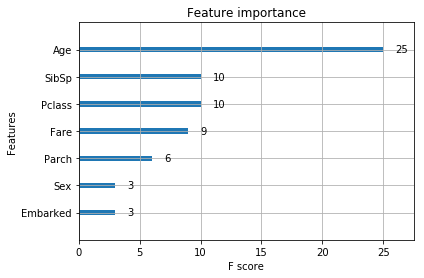

In [92]:
#optuna
from functools import partial
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def preprocess(df):
    df['Fare'] = df ['Fare'].fillna(df['Fare'].mean())
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna('Unknown')
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    df['Embarked'] = df['Embarked'].map( {'S':0,'C':1,'Q':2,'Unknown':3} ).astype(int)
    df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
    return df

def train(df,max_depth,learning_rate,num_round,gamma,min_childe_weigh,colsample_bytree,alpha):
    train_x = df.drop('Survived',axis=1)
    train_y = df.Survived
    dtrain = xgb.DMatrix(train_x,label=train_y)
    param = { 'max_depth':max_depth,'learning_rate':learning_rate,'objective':'binary:logistic','gamma':gamma,'min_childe_weigh':min_childe_weigh,'colsample_bytree':colsample_bytree,'alpha':alpha,'silent':1}
    bst = xgb.train(param,dtrain,num_round)
    return bst

def predict(bst,df):
    return bst.predict(xgb.DMatrix(df))

def objective(df, df_test, y,trial):
    #目的関数
    max_depth = trial.suggest_int('max_depth',1,30)
    learning_rate = trial.suggest_uniform('learning_rate',0.0,1.0)
    round_num = trial.suggest_int('round_num',1,30)
    gamma = trial.suggest_uniform('gamma',0.0,1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree',0.0,1.0)
    min_childe_weigh = trial.suggest_uniform('min_childe_weigh',0.0,1.0)
    alpha = trial.suggest_uniform('alpha',0.0,1.0)
    bst = train(df,max_depth,learning_rate,round_num,gamma,min_childe_weigh,colsample_bytree,alpha)
    answer = predict(bst,df_test).round().astype(int)
    score = accuracy_score(answer.round(),y)
    return 1.0 - score

def main():
    df_original = pd.read_csv("/Users/pc1013/Desktop/first/XGBoost_optuna/df/train.csv")
    df_test = preprocess(df_original.tail(100))
    df_train = preprocess(df_original.head(791))
    y = df_test['Survived']
    df_test = df_test.drop('Survived',axis=1)
    
    #optunaの前処理
    obj_f = partial(objective, df_train, df_test, y)
    #セッション作成
    study = optuna.create_study()
    #回数
    
    study.optimize(obj_f, n_trials=500)
    
    max_depth = study.best_params['max_depth']
    learning_rate = study.best_params['learning_rate']
    round_num = study.best_params['round_num']
    subsample = 1
    colsample_bytree = study.best_params['colsample_bytree']
    min_childe_weigh = study.best_params['min_childe_weigh']
    gamma = study.best_params['gamma']
    alpha = study.best_params['alpha']
    lamb = 1
    
    
    bst = train(df_train,max_depth,learning_rate,round_num,gamma,min_childe_weigh,colsample_bytree,alpha)
    print('\nparams :',study.best_params)
    answer = predict(bst,df_train.drop('Survived',axis=1)).round().astype(int)
    print('train score :',accuracy_score(answer.round(),df_train['Survived']))
    answer = predict(bst,df_test).round().astype(int)
    xgb.plot_importance(bst)
    print('test score :',accuracy_score(answer.round(),y))

if __name__ == '__main__':
    main()
